# CycleGAN Project Report

This project focused on the application of the CycleGAN model, a pivotal deep learning framework renowned for unpaired image-to-image translation. CycleGAN's architecture leverages cycle-consistent adversarial networks, enabling it to perform complex style transfer tasks. The project's goal was centered on translating human faces into cat/dog faces and vice versa, showcasing CycleGAN's ability to handle diverse datasets without the need for paired training images.

I opted for a CycleGAN implementation using PyTorch. The necessary first step involved cloning the relevant GitHub repository, which houses the comprehensive codebase essential for running and training the CycleGAN model, followed by the installation of necessary dependencies to ensure a smooth setup. Additionally, I organized the data following the project's specified structure, segregating it into 'testA', 'testB', 'trainA', and 'trainB' folders within a specially created directory.

Training the CycleGAN model was a meticulous process, involving careful tuning of hyperparameters. I conducted the training over 20 epochs, split equally between the initial training and decay phases, with strategic checkpoints saved every 5 epochs to track progress and mitigate risks like overfitting. The model's learning rate was set at 0.0002 and the cycle consistency loss was weighted by a lambda of 10, ensuring the model's effective learning and generalization capabilities. A batch size of 1 was chosen, considering the model's memory-intensive nature.

Two custom functions, face_to_cat_dog and cat_dog_to_face, were written to streamline the testing process. These functions manipulated the model's checkpoints to facilitate the translation in both directions, ensuring that the model could interchangeably transform human faces to cat/dog faces and back.  Notably, dropout was excluded during the test phase to maintain result consistency across various inputs. The visual results of this project were compelling, demonstrating the CycleGAN model's ability to accurately and realistically translate facial features across species.

## Setting up CycleGAN Environment

#### Mount Google Drive

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Navigate to Project Directory

In [ ]:
%cd /content/drive/MyDrive/Task 1 DL CycleGAN

/content/drive/MyDrive/Task 1 DL CycleGAN


#### Clone CycleGAN Repository:

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

fatal: destination path 'pytorch-CycleGAN-and-pix2pix' already exists and is not an empty directory.


#### Navigate to Cloned Repository

In [ ]:
%cd pytorch-CycleGAN-and-pix2pix

/content/drive/MyDrive/Task 1 DL CycleGAN/pytorch-CycleGAN-and-pix2pix


#### Install Requirements

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408194 sha256=9102ad4aad3055ebecc0fdb2c8e4f9850153e54b1b2544b5bc2eb05411a555d2
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


# Datasets

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (human2cat/dog) in the `testA` folder, images you want to transform from b to a (cat/dog2human) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

# Training

### Instructions for Running the Code:

Specify Data Root and Model Configuration:

*   Modify the --dataroot parameter to point to your dataset directory.
*   Adjust other parameters such as --name, --model, --n_epochs, --n_epochs_decay, and --save_epoch_freq based on your training preferences.





In [ ]:
!python train.py --dataroot '/content/drive/MyDrive/Task 1 DL CycleGAN/pytorch-CycleGAN-and-pix2pix/data' --name face2catdog --model cycle_gan --display_id -1 --n_epochs=10 --n_epochs_decay=10 --save_epoch_freq=5

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/Task 1 DL CycleGAN/pytorch-CycleGAN-and-pix2pix/data	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
              

# Testing

Run the Testing Script:

*   Execute the cell to initiate the testing process.




In [ ]:
!python test.py --dataroot '/content/drive/MyDrive/Task 1 DL CycleGAN/pytorch-CycleGAN-and-pix2pix/data/testA' --name face2catdog --model test --no_dropout

# Transformation Functions for CycleGAN Model

In [ ]:
def face_to_cat_dog():
  os.rename('./checkpoints/face2catdog/latest_net_G_A.pth', './checkpoints/face2catdog/latest_net_G.pth')
  !python test.py --dataroot '/content/drive/MyDrive/Task 1 DL CycleGAN/pytorch-CycleGAN-and-pix2pix/data/testA' --name face2catdog --model test --no_dropout
  os.rename('./checkpoints/face2catdog/latest_net_G.pth', './checkpoints/face2catdog/latest_net_G_A.pth')

In [ ]:
def cat_dog_to_face():
  os.rename('./checkpoints/face2catdog/latest_net_G_B.pth', './checkpoints/face2catdog/latest_net_G.pth')
  !python test.py --dataroot '/content/drive/MyDrive/Task 1 DL CycleGAN/pytorch-CycleGAN-and-pix2pix/data/testB' --name face2catdog --model test --no_dropout
  os.rename('./checkpoints/face2catdog/latest_net_G.pth', './checkpoints/face2catdog/latest_net_G_B.pth')

In [ ]:
face_to_cat_dog()

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/Task 1 DL CycleGAN/pytorch-CycleGAN-and-pix2pix/data/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
     

# Visualizing Real and Fake Images Generated by CycleGAN

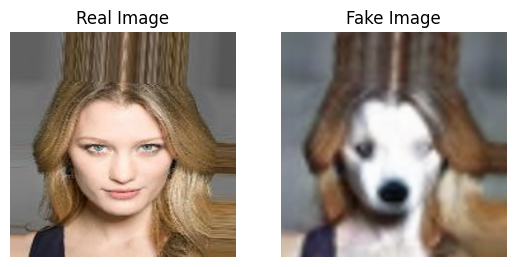

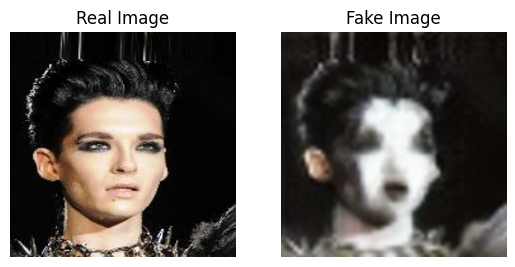

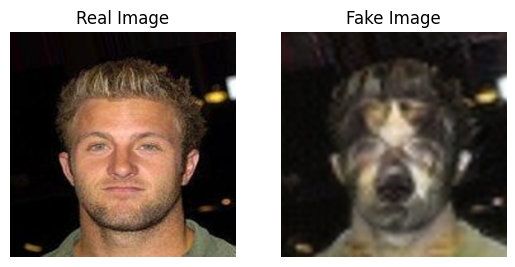

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Image file paths
real1path = '/content/drive/MyDrive/Task 1 DL CycleGAN/pytorch-CycleGAN-and-pix2pix/results/face2catdog/test_latest/images/143931_real.png'
fake1path = '/content/drive/MyDrive/Task 1 DL CycleGAN/pytorch-CycleGAN-and-pix2pix/results/face2catdog/test_latest/images/143931_fake.png'
real2path = '/content/drive/MyDrive/Task 1 DL CycleGAN/pytorch-CycleGAN-and-pix2pix/results/face2catdog/test_latest/images/143927_real.png'
fake2path = '/content/drive/MyDrive/Task 1 DL CycleGAN/pytorch-CycleGAN-and-pix2pix/results/face2catdog/test_latest/images/143927_fake.png'
real3path = '/content/drive/MyDrive/Task 1 DL CycleGAN/pytorch-CycleGAN-and-pix2pix/results/face2catdog/test_latest/images/143937_real.png'
fake3path = '/content/drive/MyDrive/Task 1 DL CycleGAN/pytorch-CycleGAN-and-pix2pix/results/face2catdog/test_latest/images/143937_fake.png'

# Load images using mpimg.imread
real1 = mpimg.imread(real1path)
fake1 = mpimg.imread(fake1path)
real2 = mpimg.imread(real2path)
fake2 = mpimg.imread(fake2path)
real3 = mpimg.imread(real3path)
fake3 = mpimg.imread(fake3path)

plt.subplot(1, 2, 1)
plt.imshow(real1)
plt.title('Real Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake1)
plt.title('Fake Image')
plt.axis('off')

plt.show()

plt.subplot(1, 2, 1)
plt.imshow(real2)
plt.title('Real Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake2)
plt.title('Fake Image')
plt.axis('off')

plt.show()

plt.subplot(1, 2, 1)
plt.imshow(real3)
plt.title('Real Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake3)
plt.title('Fake Image')
plt.axis('off')

plt.show()

# Code for Demo:

Image Upload

In [ ]:
from google.colab import drive
from google.colab import files
import shutil

# Mount Google Drive
drive.mount('/content/drive')

def save_image_to_drive():
    # Prompt the user to upload an image file
    uploaded = files.upload()

    # Move the uploaded file to Google Drive
    for filename in uploaded.keys():
        # Change the path to 'testA' or 'testB' based on the transformation direction
        # If transforming human faces to cat/dog, use 'testA'; for cat/dog to human, use 'testB'
        shutil.move(filename, '/content/drive/MyDrive/Task 1 DL CycleGAN/pytorch-CycleGAN-and-pix2pix/data/testA' + filename)
        print(f"Image '{filename}' saved to Google Drive.")

# Call the function to save an uploaded image to Google Drive
save_image_to_drive()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
face_to_cat_dog()
# Uncomment the line below if you want to transform cat/dog to human faces
# cat_dog_to_face()

# Visualization of Real and Fake Images (Demo)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Image file paths
realdemopath = '/realdemopath/'
fakedemopath = '/fakedemopath/'

# Load images using mpimg.imread
realdemo = mpimg.imread(realdemopath)
fakedemo = mpimg.imread(fakedemopath)

plt.subplot(1, 2, 1)
plt.imshow(realdemo)
plt.title('Real Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fakedemo)
plt.title('Fake Image')
plt.axis('off')

plt.show()